In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
import os
import json
import matplotlib.pyplot as plt

In [ ]:

model_path_3 = f"../../../models/train_std_logs/run_0/logs/metrics.json"
#model_path_3 = f"../experiments/gnn_cnn_coverage_overfit/logs/metrics.json"
with open(model_path_3, "r") as f:
    model_metrics_3 = json.load(f)
#plt.plot(model_metrics_3["val/error_centroid_x"])
#plt.plot(model_metrics_3["val/error_centroid_y"])
#plt.plot(model_metrics_3["val/error_integral"])
plt.plot(model_metrics_3["train/loss"])
plt.plot(model_metrics_3["val/loss"][1:])
plt.legend(['train', 'val'])
plt.xlabel('Epochs')
plt.ylabel('Feature Prediction Error')
#np.max(model_metrics_3["val/coverage_reward"])

(99, 1000)
(36, 1000)
(99, 1000)
(99, 1000)


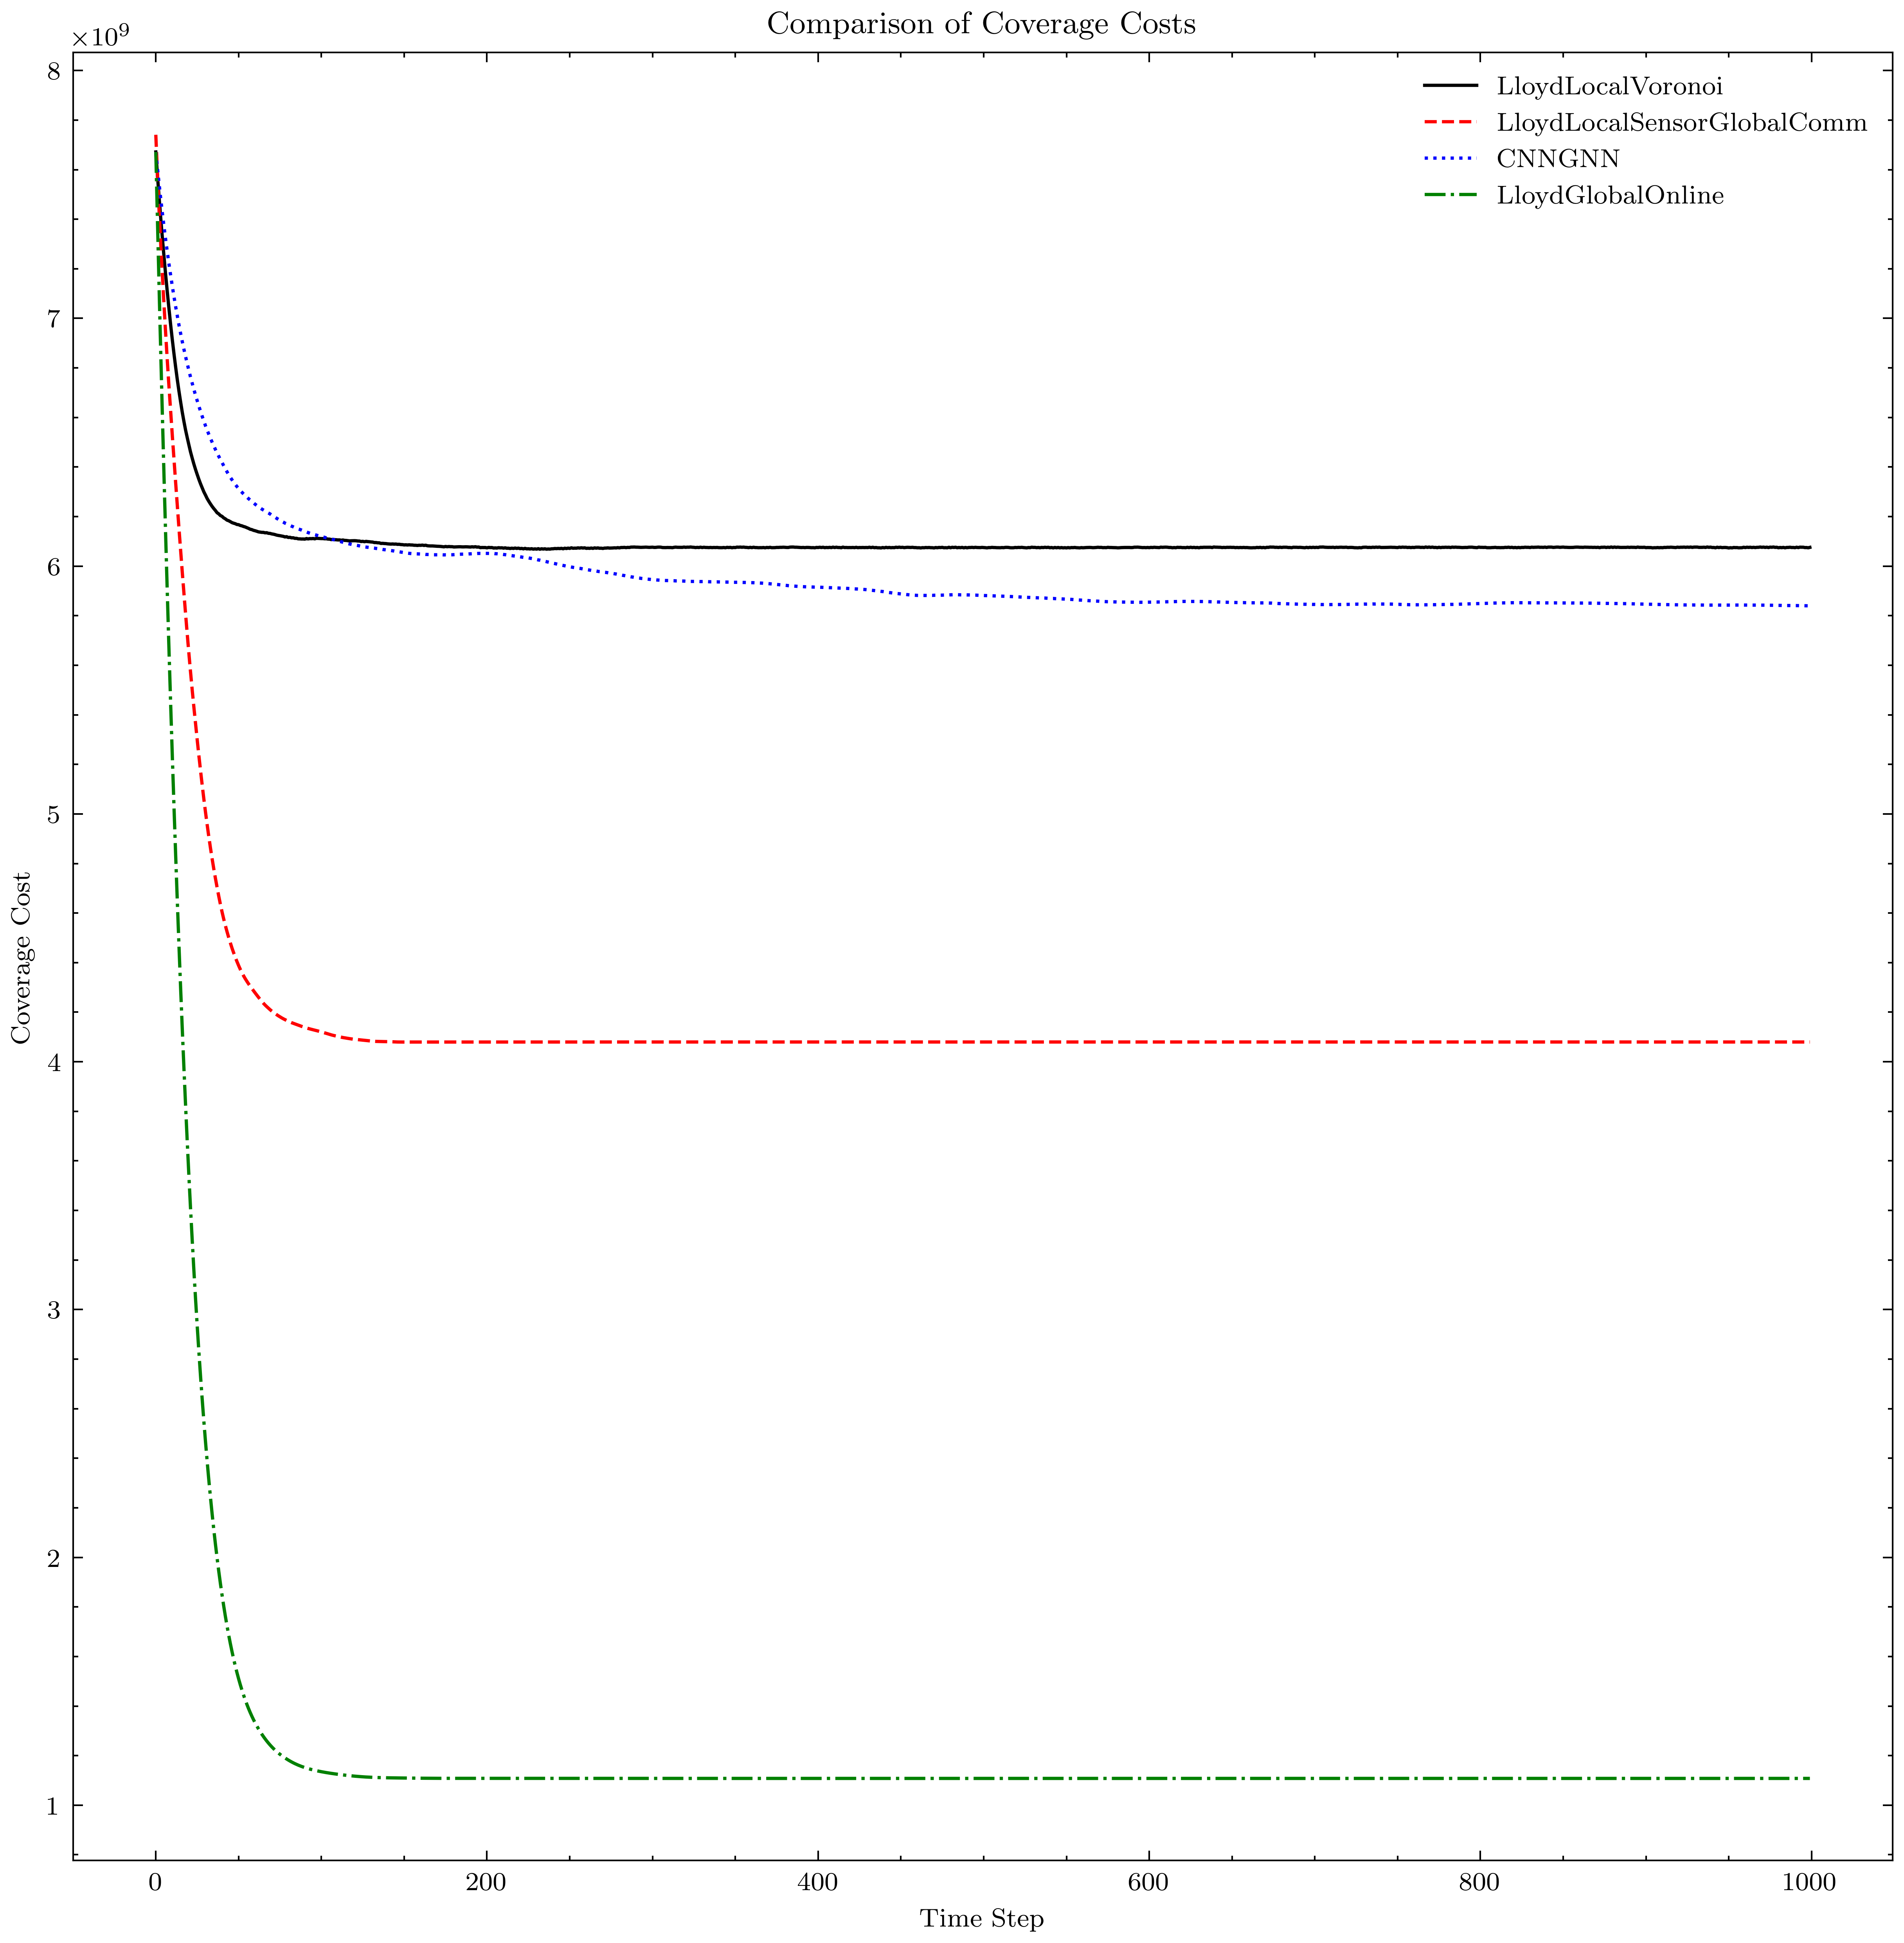

In [57]:
from numpy import genfromtxt

import scienceplots

def compute_quartiles(data):
    Q1, median, Q3 = np.percentile(data, [25, 50, 75])

    IQR = Q3 - Q1

    loval = Q1 - 1.5 * IQR
    hival = Q3 + 1.5 * IQR

    wiskhi = np.compress(data <= hival, data)
    wisklo = np.compress(data >= loval, data)
    actual_hival = np.max(wiskhi)
    actual_loval = np.min(wisklo)

    Qs = [np.mean(data), actual_loval, actual_hival]
    return Qs


results_dir = '/root/CoverageControl_ws/results/'
controllers = ["LloydLocalVoronoi","LloydLocalSensorGlobalComm", "CNNGNN","LloydGlobalOnline"]


num_controllers = len(controllers)

data = []
for controller in controllers:
    file_name = results_dir + controller + '/eval.csv'
    controller_data = genfromtxt(file_name, delimiter=',')
    print(controller_data.shape)
    data.append(np.mean(controller_data[:, :], axis = 0))


#lloyds = np.stack(cov["lloyds"])
#Qs_all = np.zeros((num_controllers, episode_size, 3))
#for c in range(num_controllers):
#    cov[controllers[c]] = (np.mean(coverage_data_all[c], axis=0), np.std(coverage_data_all[c], axis=0))
#    for i in range(episode_size):
#        Qs_all[c, i] = (compute_quartiles(coverage_data_all[c, :, i]))
    #prev_val = np.stack(cov[c])
    #cov[c] = (np.mean(np.stack(cov[c]), axis=0), np.std(np.stack(cov[c]), axis=0))
    #cov[f"{c}_norm"] = (np.mean(prev_val/lloyds, axis=0), np.std(prev_val/lloyds, axis=0))
    #exp[c] = np.mean(np.stack(exp[c]), axis=0)
    #wexp[c] = np.mean(np.stack(wexp[c]), axis=0)


SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 22

#plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
#plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
#plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
#plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
#plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
#plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize


plt.figure(figsize=(10,10))
for c in range(num_controllers):
    #plt.plot(Qs_all[c,:,1])
    plt.plot(data[c])

plt.style.use(['science','ieee'])
plt.xlabel('Time Step')
plt.ylabel('Coverage Cost')
plt.title('Comparison of Coverage Costs')
plt.legend(controllers)

plt.show()

#plt.figure(figsize=(10,10))
#N = [50, 100, 500, 1000]
#cost_vals = []
#for i in range(len(controllers)):
#    c = controllers[i]
#    o = oracles[i]
#    cost_vals.append(np.min(cov[c][0][-1]) / np.min(cov[o][0][-1]))
#plt.plot(N, cost_vals)
#plt.xlabel('Number of Agents')
#plt.ylabel('Ratio of Learned to Expert Controller Costs')
#plt.title('Effect of Varying Agent Density', fontsize=22)
#plt.legend(controllers)
#plt.show()

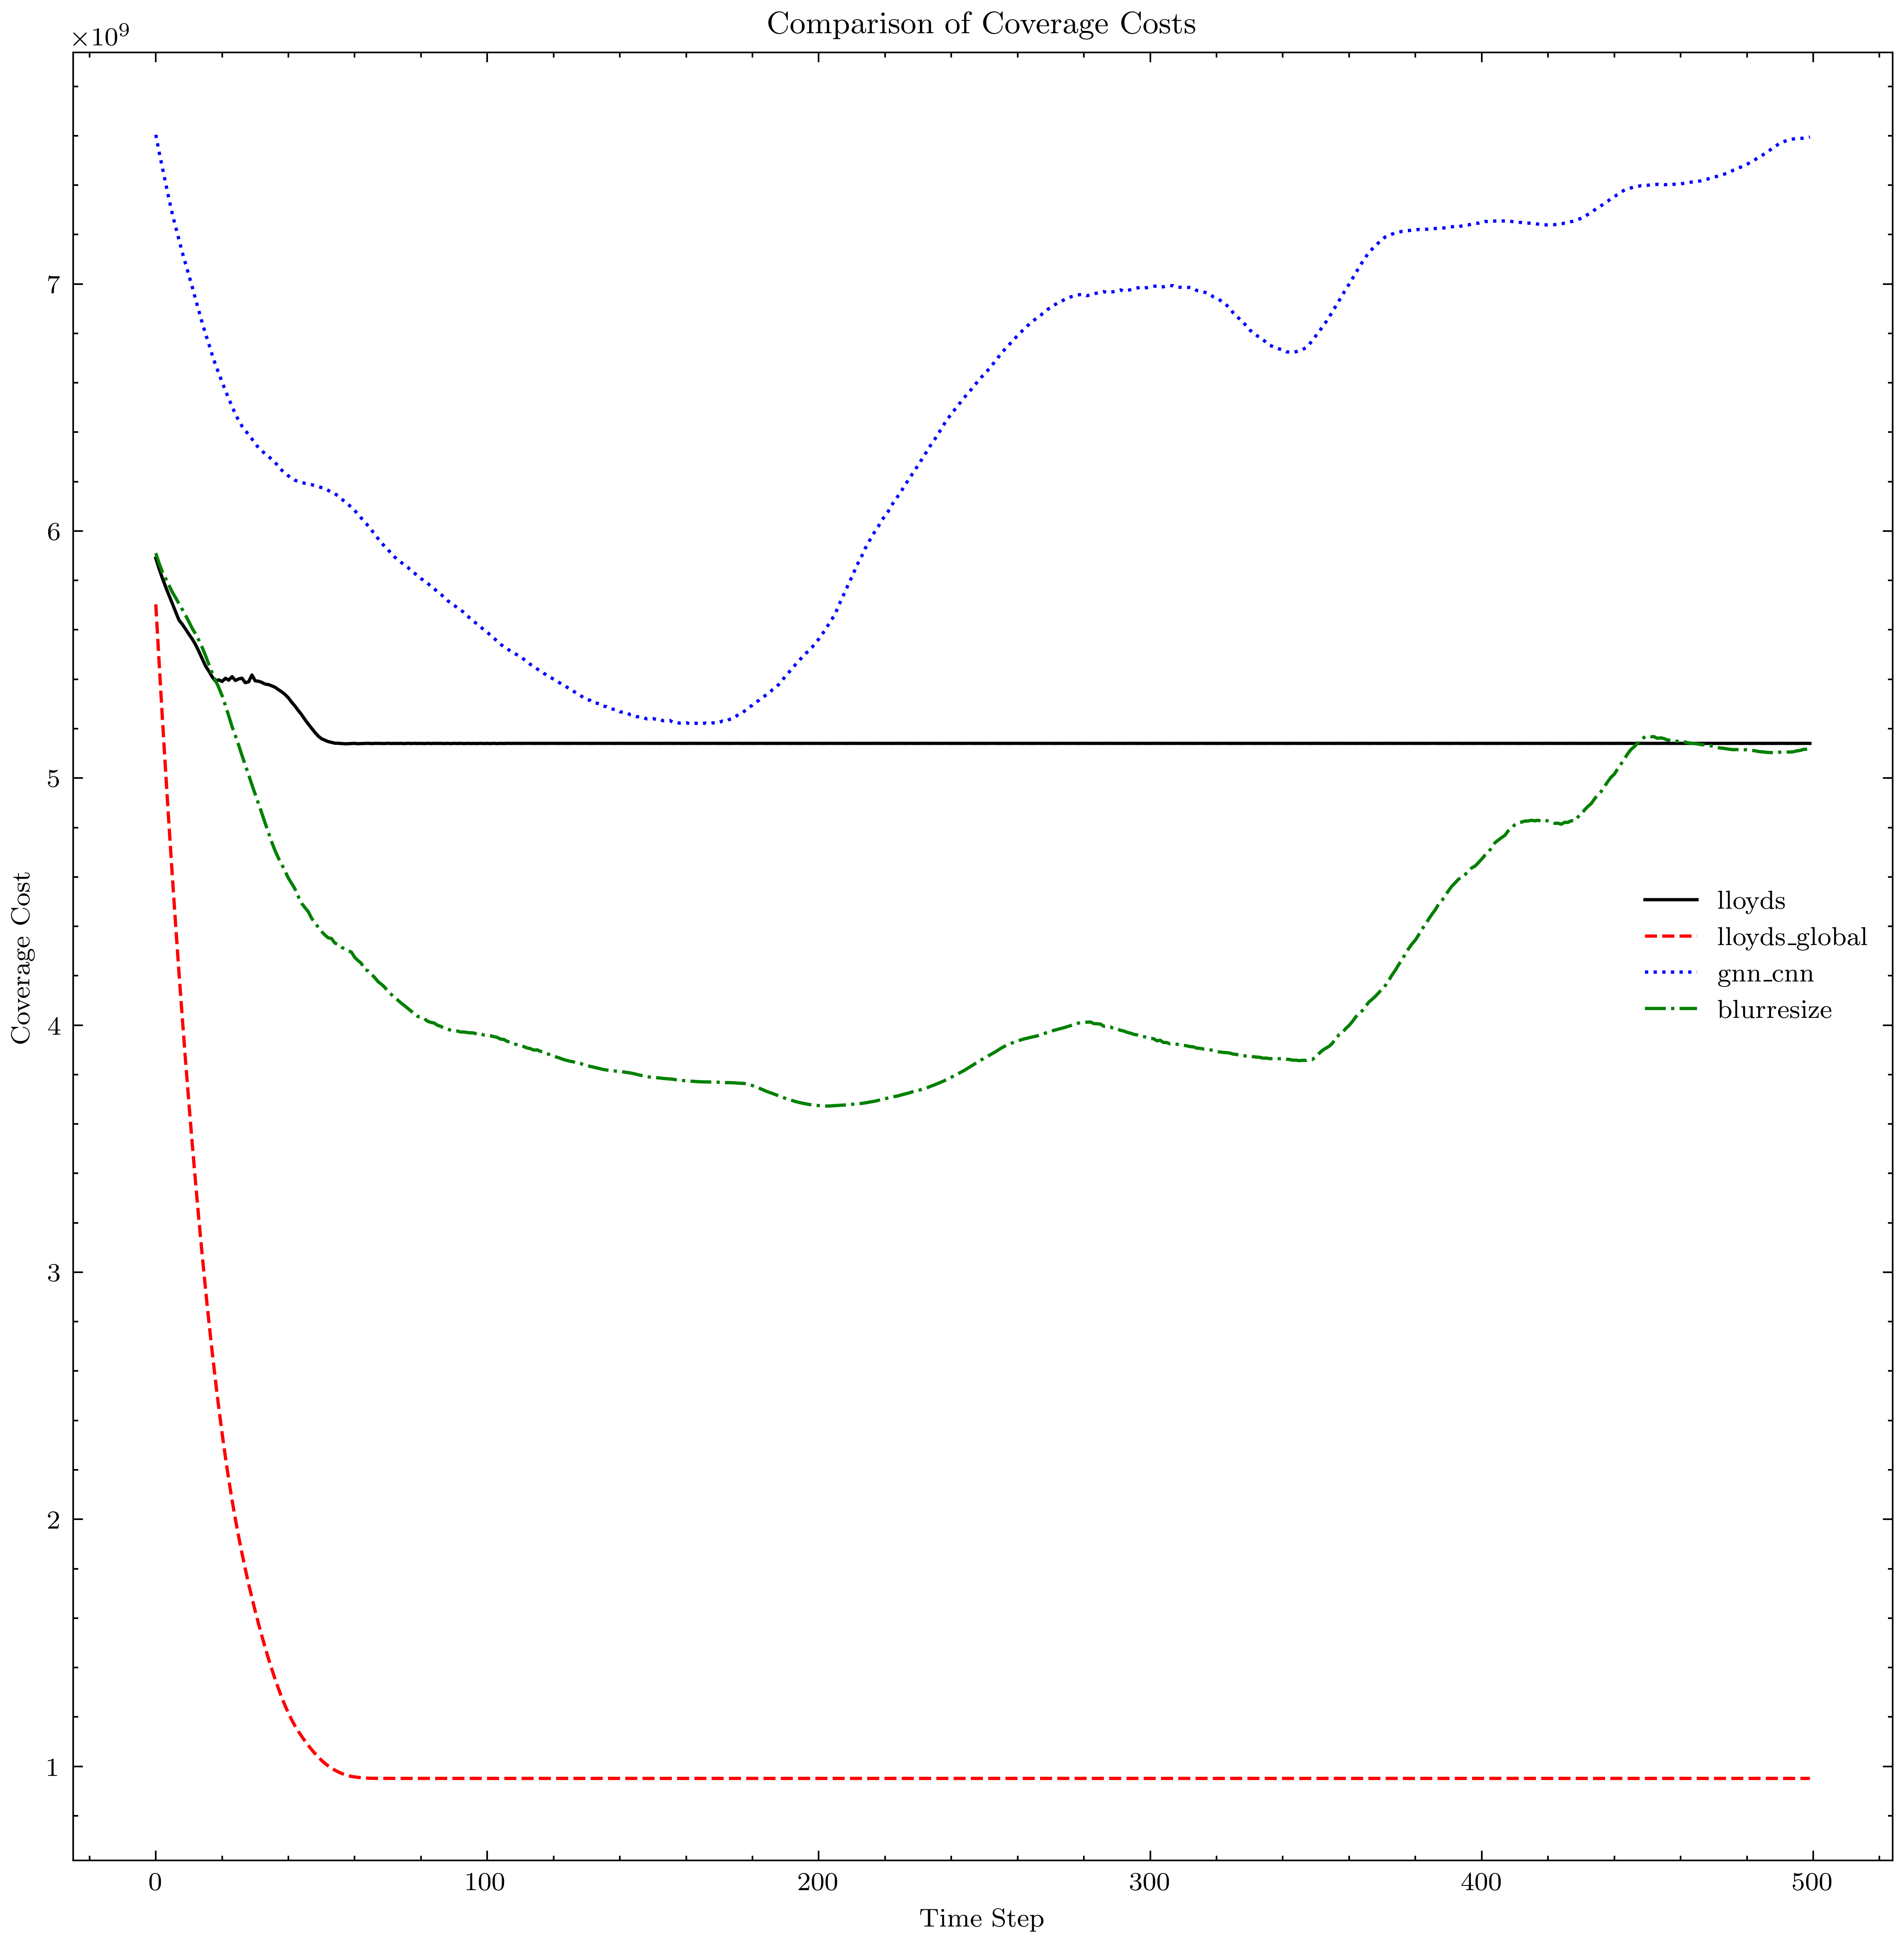

In [37]:
from numpy import genfromtxt

import scienceplots

def compute_quartiles(data):
    Q1, median, Q3 = np.percentile(data, [25, 50, 75])

    IQR = Q3 - Q1

    loval = Q1 - 1.5 * IQR
    hival = Q3 + 1.5 * IQR

    wiskhi = np.compress(data <= hival, data)
    wisklo = np.compress(data >= loval, data)
    actual_hival = np.max(wiskhi)
    actual_loval = np.min(wisklo)

    Qs = [np.mean(data), actual_loval, actual_hival]
    return Qs

controllers = ["lloyds", "lloyds_global", "gnn_cnn", "blurresize"]
#oracles = ["gnn_k2", "oracle_n100", "oracle_n500", "oracle_n1000"]
#controllers_no_lloyds = ["oracle_old", "gnn2_old", "gnn3_old", "gnn5_old", "gnn7_old", "gnn2_new", "gnn3_new", "gnn5_new", "gnn7_new"]
#controllers_no_lloyds = ["oracle_old", "gnn2_old"]

cov = {}
exp = {}
wexp = {}

dataset_size = 1
episode_size = 500
num_controllers = len(controllers)
coverage_data_all = np.zeros((num_controllers, dataset_size, episode_size))
for c in range(num_controllers):
    #cov[c] = []
    #exp[c] = []
    #wexp[c] = []
    for i in range(0, dataset_size):
        coverage_data_all[c, i] = np.load(f"/root/CoverageControl_ws/src/gnn_coverage_control/results/{controllers[c]}/coverage_cost_{i}.npy")
        #exp[c].append(np.load(f"../video_testing/{c}/exploration_ratio_{i}.npy")[-500:])
        #wexp[c].append(np.load(f"../video_testing/{c}/weighted_exploration_ratio_{i}.npy")[-500:])


#lloyds = np.stack(cov["lloyds"])
Qs_all = np.zeros((num_controllers, episode_size, 3))
for c in range(num_controllers):
    cov[controllers[c]] = (np.mean(coverage_data_all[c], axis=0), np.std(coverage_data_all[c], axis=0))
    for i in range(episode_size):
        Qs_all[c, i] = (compute_quartiles(coverage_data_all[c, :, i]))
    #prev_val = np.stack(cov[c])
    #cov[c] = (np.mean(np.stack(cov[c]), axis=0), np.std(np.stack(cov[c]), axis=0))
    #cov[f"{c}_norm"] = (np.mean(prev_val/lloyds, axis=0), np.std(prev_val/lloyds, axis=0))
    #exp[c] = np.mean(np.stack(exp[c]), axis=0)
    #wexp[c] = np.mean(np.stack(wexp[c]), axis=0)
    
    

plt.figure(figsize=(10,10))
for c in range(num_controllers):
    #plt.plot(Qs_all[c,:,1])
    plt.plot(cov[controllers[c]][0])

plt.style.use(['science','ieee'])
plt.xlabel('Time Step')
plt.ylabel('Coverage Cost')
plt.title('Comparison of Coverage Costs')
plt.legend(controllers)

plt.show()

In [2]:
import torch
import matplotlib
import matplotlib.pyplot as plt

In [24]:
comm_maps = torch.load('/root/CoverageControl_ws/datasets/pure_coverage_old/gnn_STABLE/test/coverage_maps.pt')
robot_positions = torch.load('/root/CoverageControl_ws/datasets/pure_coverage_old/gnn_STABLE/test/robot_positions.pt')

print(comm_maps.shape)
print(robot_positions.shape)

torch.Size([10000, 50, 2, 32, 32])
torch.Size([10000, 50, 2])


tensor([ 22.5237, 812.4753])


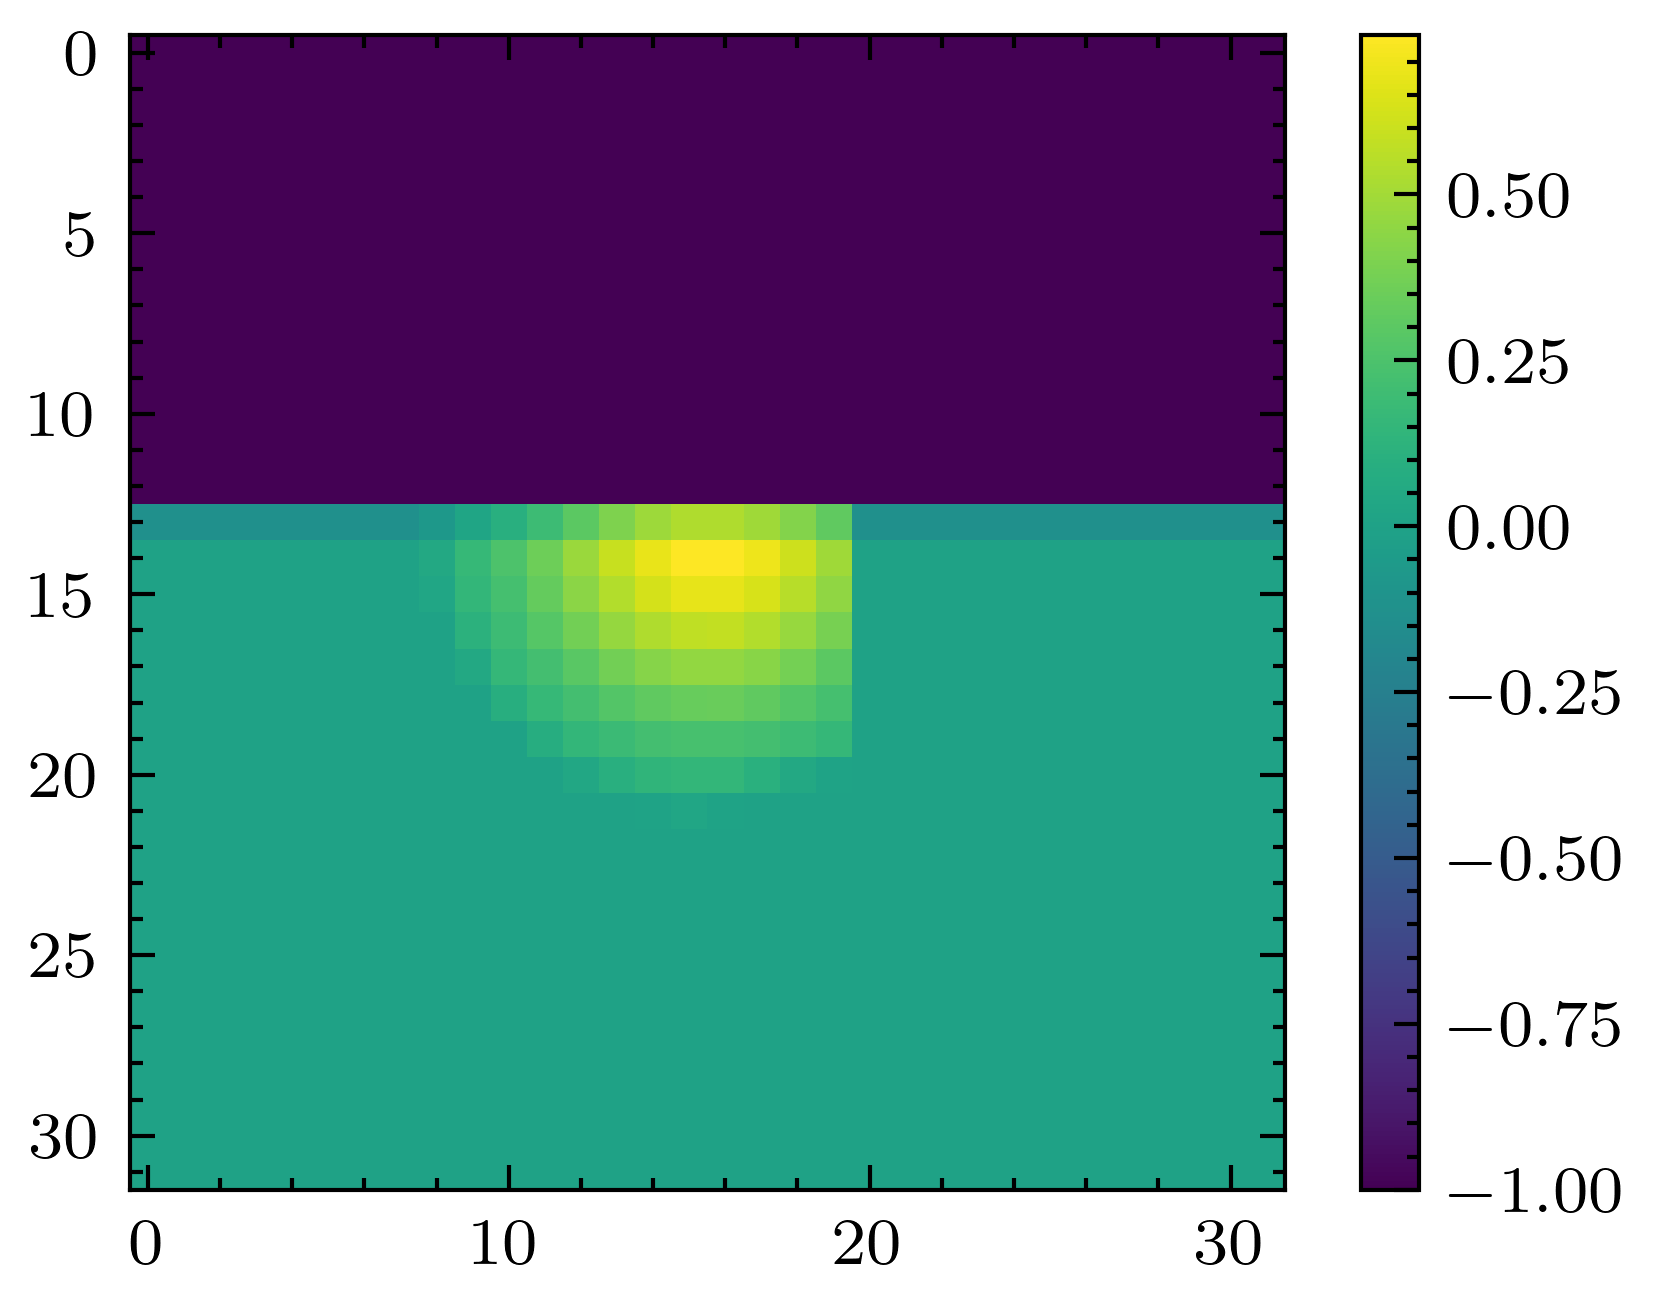

In [26]:
print(robot_positions[200,8])
plt.figure()
plt.imshow(comm_maps[200][8][0])
plt.colorbar()
plt.show()

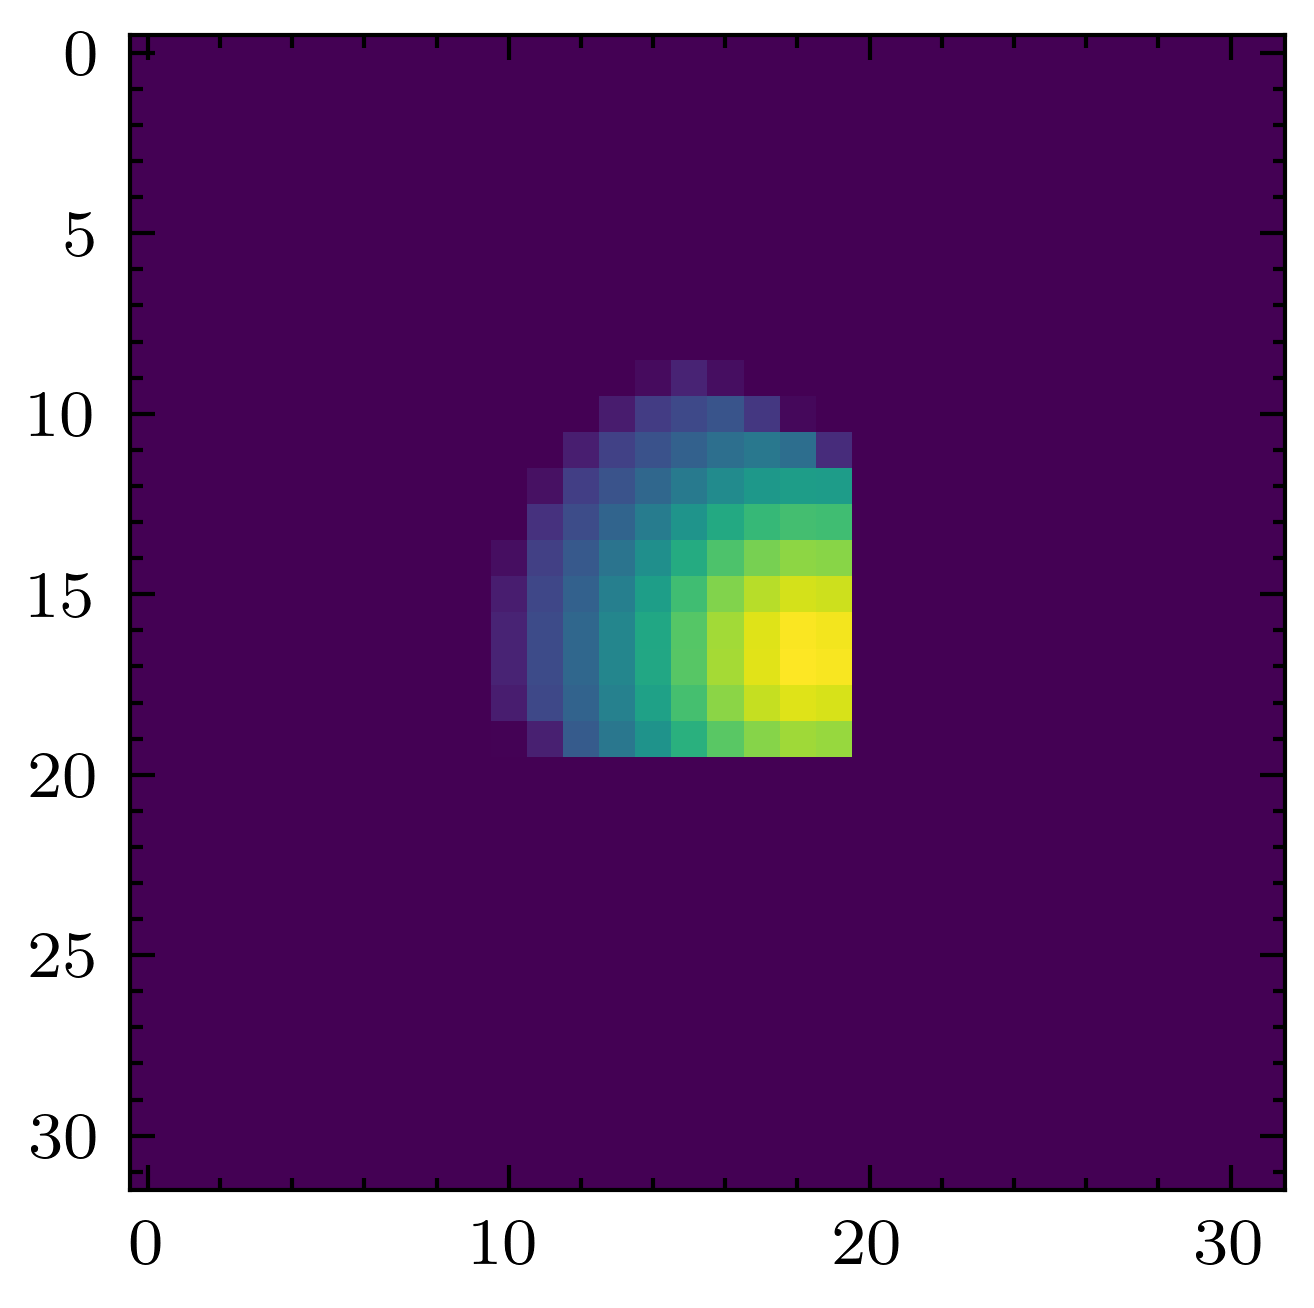

In [9]:
plt.figure()
plt.imshow(comm_maps[200][0][0])
plt.show()

In [29]:
comm_maps = torch.load('/root/CoverageControl_ws/datasets/reasonable_pure_coverage_ramya/gnn_STABLE/test/coverage_maps.pt')
comm_maps.shape
robot_positions = torch.load('/root/CoverageControl_ws/datasets/reasonable_pure_coverage_ramya/gnn_STABLE/test/robot_positions.pt')
print(robot_positions.shape)

torch.Size([10000, 50, 2])


In [36]:
robot_positions[1000][36]

tensor([  44.5524, 1562.8663])

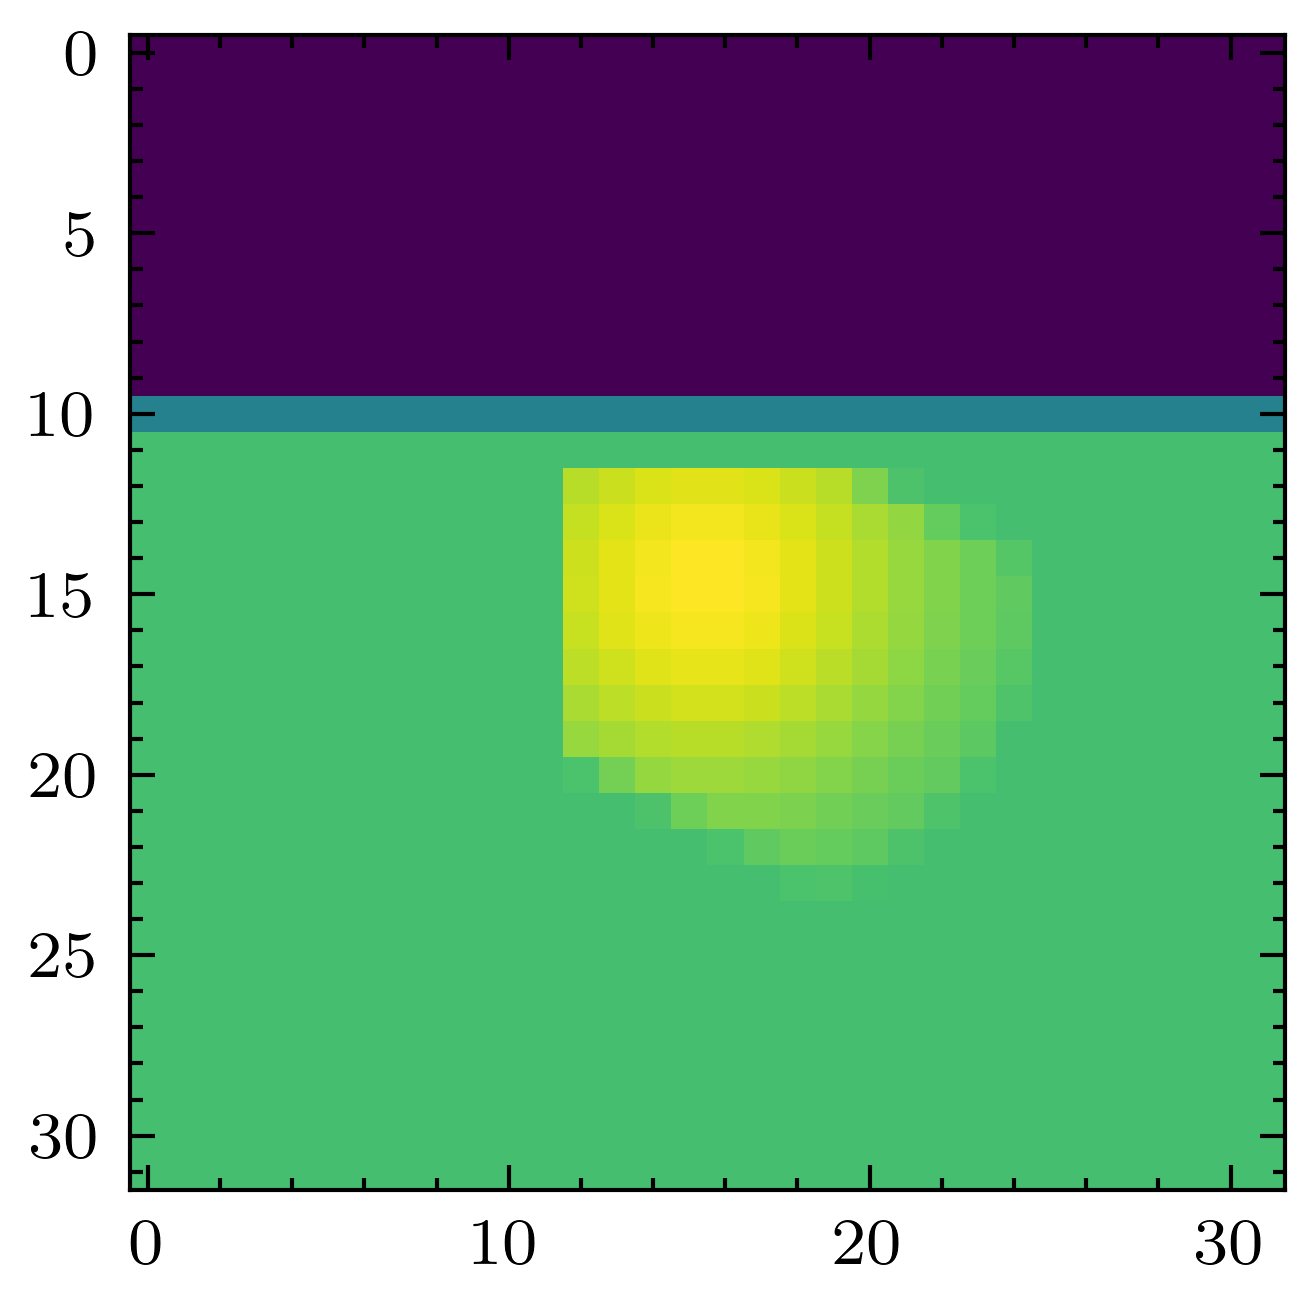

In [38]:
plt.figure()
plt.imshow(comm_maps[1000][36][0])
plt.show()